In [1]:
!pip install matplotlib seaborn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import matplotlib.pyplot as plt
import seaborn as sns


nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [3]:
def preprocess_tweet(tweet):
    # Remove URLs, mentions, and hashtags
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)
    tweet = re.sub(r'@\w+|#\w+', '', tweet)

    # Convert to lowercase
    tweet = tweet.lower()

    # Remove punctuation and special characters
    tweet = re.sub(r'[^\w\s]', '', tweet)

    # Remove stop words and lemmatize
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    tweet = ' '.join([lemmatizer.lemmatize(word) for word in tweet.split() if word not in stop_words])

    return tweet

# Load the tweets dataset, specifying the encoding and no header
tweets_df = pd.read_csv('tweet.csv', encoding='latin-1', header=None)  # header=None tells pandas there are no headers

# Assign column names
tweets_df.columns = ['id', 'timestamp', 'date', 'query', 'user', 'tweet'] # Replace with your actual column order

# Apply preprocessing to the 'tweet' column
tweets_df['text'] = tweets_df['tweet'].apply(preprocess_tweet)

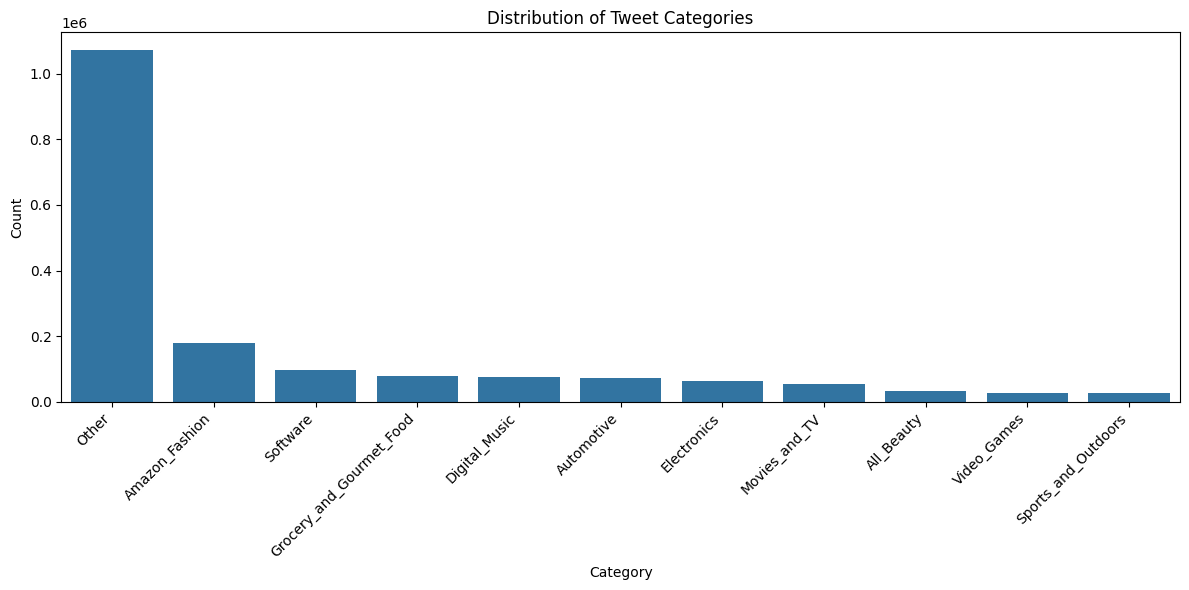

In [8]:
def assign_category(tweet):
    categories = {
        "All_Beauty": ["beauty", "makeup", "cosmetics", "skincare", "haircare", "fragrance", "perfume", "nail", "salon", "spa", "lotion", "cream", "lipstick", "eyeliner", "mascara", "foundation", "blush", "eyeshadow", "shampoo", "conditioner", "hairstyling", "manicure", "pedicure", "facial", "massage", "waxing", "sephora", "ulta", "mac", "maybelline", "loreal", "revlon", "clinique", "este lauder", "lancome"],
        "Amazon_Fashion": ["fashion", "clothing", "shoes", "accessories", "dress", "shirt", "pants", "jeans", "jacket", "coat", "handbag", "jewelry", "watch", "sunglasses", "style", "trend", "outfit", "apparel", "footwear", "sneaker", "heel", "boot", "sandal", "scarf", "belt", "hat", "bag", "purse", "wallet", "necklace", "earring", "bracelet", "ring", "nike", "adidas", "puma", "zara", "h&m", "forever 21", "levi's", "ralph lauren", "gucci", "prada", "louis vuitton"],
        "Automotive": ["car", "vehicle", "auto", "engine", "tire", "wheel", "brake", "repair", "maintenance", "driving", "road", "travel", "automobile", "truck", "suv", "sedan", "coupe", "sports car", "electric car", "hybrid car", "gasoline", "diesel", "mileage", "fuel", "transmission", "steering", "suspension", "airbag", "seatbelt", "navigation", "gps", "tesla", "toyota", "honda", "ford", "chevrolet", "bmw", "mercedes-benz", "audi", "volkswagen"],
        "Electronics": ["electronics", "gadget", "phone", "laptop", "computer", "tablet", "camera", "tv", "speaker", "headphone", "charger", "battery", "smartphone", "android", "ios", "iphone", "samsung", "google", "apple", "dell", "hp", "lenovo", "asus", "acer", "sony", "canon", "nikon", "bose", "jbl", "beats", "anker", "belkin"],
        "Digital_Music": ["music", "song", "album", "artist", "band", "singer", "concert", "streaming", "spotify", "apple music", "mp3", "audio", "playlist", "genre", "rock", "pop", "hip hop", "classical", "jazz", "country", "electronic", "dance", "sound", "melody", "rhythm", "instrument", "guitar", "piano", "drums", "vocals", "microphone"],
        "Software": ["software", "program", "app", "code", "development", "programming", "web", "mobile", "database", "cloud", "python", "java", "application", "website", "design", "coding", "algorithm", "data", "security", "cybersecurity", "artificial intelligence", "machine learning", "deep learning", "microsoft", "google", "apple", "amazon", "facebook", "oracle", "salesforce", "adobe"],
        "Sports_and_Outdoors": ["sport", "outdoor", "fitness", "hiking", "running", "cycling", "swimming", "yoga", "gym", "camping", "fishing", "hunting", "football", "basketball", "baseball", "soccer", "tennis", "golf", "cricket", "hockey", "volleyball", "training", "exercise", "workout", "equipment", "gear", "apparel", "shoes", "nike", "adidas", "under armour", "reebok", "columbia", "patagonia", "north face"],
        "Video_Games": ["game", "gaming", "console", "playstation", "xbox", "nintendo", "pc gaming", "steam", "online", "multiplayer", "controller", "virtual reality", "video game", "esports", "streamer", "twitch", "youtube", "action", "adventure", "rpg", "strategy", "shooter", "simulation", "sports", "racing", "puzzle", "fortnite", "call of duty", "league of legends", "minecraft", "grand theft auto", "fifa", "madden"],
        "Grocery_and_Gourmet_Food": ["food", "grocery", "gourmet", "recipe", "cooking", "baking", "restaurant", "cafe", "meal", "dinner", "lunch", "breakfast", "organic", "vegan", "vegetarian", "produce", "meat", "seafood", "dairy", "bakery", "snacks", "beverages", "coffee", "tea", "wine", "beer", "chocolate", "cheese", "pasta", "rice", "bread", "cereal", "fruits", "vegetables", "whole foods", "trader joe's", "walmart", "target", "kroger", "amazon fresh", "instacart"],
        "Movies_and_TV": ["movie", "film", "tv", "series", "cinema", "netflix", "hulu", "amazon prime", "actor", "actress", "director", "trailer", "drama", "comedy", "action", "adventure", "sci-fi", "fantasy", "horror", "thriller", "romance", "documentary", "animation", "anime", "superhero", "marvel", "dc", "disney", "pixar", "hbo", "showtime", "starz", "amc", "fx", "cnn", "fox", "nbc", "cbs", "abc"]
    }
    found_categories = []  # To store found categories for this tweet
    for category, keywords in categories.items():
        for keyword in keywords:
            if keyword in tweet:
                found_categories.append(category)  # Add to list if found
                # Optional: Add break here if you only want the first match per category
    return found_categories or ['Other']  # Return list or 'Other' if none found

# Load the tweets dataset using the correct encoding
tweets_df = pd.read_csv('tweet.csv', encoding='latin-1', header=None)
tweets_df.columns = ['id', 'timestamp', 'date', 'query', 'user', 'tweet']

# Preprocess the tweets
tweets_df['text'] = tweets_df['tweet'].apply(preprocess_tweet)

# Assign categories using the function
tweets_df['category'] = tweets_df['text'].apply(assign_category)

# Explode the 'category' column to create individual rows for each category
tweets_df_exploded = tweets_df.explode('category')

# Create a DataFrame with category counts using the exploded DataFrame
category_counts = tweets_df_exploded['category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']

# Visualize category counts using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Count', data=category_counts)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Tweet Categories')
plt.tight_layout()
plt.show()

# Split into training and testing sets (using the exploded DataFrame)
X_train, X_test, y_train, y_test = train_test_split(
    tweets_df_exploded['text'], tweets_df_exploded['category'], test_size=0.2, random_state=42
)


In [9]:
import pandas as pd
from collections import defaultdict

user_categories = defaultdict(lambda: defaultdict(int))

for index, row in tweets_df.iterrows():
    user = row['user']
    # Access the 'category' column instead of 'categories'
    categories = row['category']
    for category in categories:
        user_categories[user][category] += 1

# Convert to DataFrame for easier analysis
user_category_df = pd.DataFrame.from_dict(user_categories, orient='index').fillna(0)

In [10]:
def get_top_categories(user, threshold=2):  # Example threshold
    """Returns the top categories for a user based on frequency."""
    # Check if the user exists in the DataFrame index
    if user not in user_category_df.index:
        print(f"User '{user}' not found in the dataset.")
        return []  # Or raise an exception if you prefer

    category_counts = user_category_df.loc[user].sort_values(ascending=False)
    top_categories = category_counts[category_counts >= threshold].index.tolist()
    return top_categories

# Get a list of actual user IDs from your DataFrame
actual_user_ids = tweets_df['user'].unique().tolist()

# Print a few user IDs to see their format
print("Some user IDs in your dataset:", actual_user_ids[:50])  # Print the first 50

# Example usage: Replace 'user1' with an actual user ID from your dataset
top_categories_for_user = get_top_categories(actual_user_ids[0])
print(f"Top categories for user {actual_user_ids[0]}: {top_categories_for_user}")

Some user IDs in your dataset: ['_TheSpecialOne_', 'scotthamilton', 'mattycus', 'ElleCTF', 'Karoli', 'joy_wolf', 'mybirch', 'coZZ', '2Hood4Hollywood', 'mimismo', 'erinx3leannexo', 'pardonlauren', 'TLeC', 'robrobbierobert', 'bayofwolves', 'HairByJess', 'lovesongwriter', 'armotley', 'starkissed', 'gi_gi_bee', 'quanvu', 'swinspeedx', 'cooliodoc', 'viJILLante', 'Ljelli3166', 'ChicagoCubbie', 'KatieAngell', 'gagoo', 'abel209', 'BaptisteTheFool', 'fatkat309', 'EmCDL', 'merisssa', 'Pbearfox', 'jsoo', 'scarletletterm', 'crosland_12', 'ajaxpro', 'Tmttq86', 'Anthony_Nguyen', 'itsanimesh', 'lionslamb', 'kennypham', 'DdubsShellBell', 'hpfangirl94', 'antzpantz', 'labrt2004', 'IrisJumbe', 'peacoats', 'cyantist']
Top categories for user _TheSpecialOne_: []


In [11]:
# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train a Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_vec, y_train)

MultinomialNB()

In [12]:
# Predict categories for the test set
y_pred = classifier.predict(X_test_vec)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8305495893872394


In [13]:
# Function to save the model and vectorizer
def save_model_and_vectorizer(classifier, vectorizer):
  import pickle
  with open('tweet_classifier.pkl', 'wb') as f:
      pickle.dump(classifier, f)
  with open('tfidf_vectorizer.pkl', 'wb') as f:
      pickle.dump(vectorizer, f)

In [14]:
# Funktion zur Vorhersage der Tweet-Kategorie
def predict_tweet_category(tweet):
  import pickle
  # Lade den Klassifikator und den Vektorisierer
  with open('tweet_classifier.pkl', 'rb') as f:
      classifier = pickle.load(f)
  with open('tfidf_vectorizer.pkl', 'rb') as f:
      vectorizer = pickle.load(f)

  # Import the preprocess_tweet function if it's in a different file/cell
  from IPython.display import display # This line ensures the current cell is displayed
                                     # after execution, preventing issues with function
                                     # visibility across cells in a notebook environment
  from __main__ import preprocess_tweet # This import specifically imports the
                                        # preprocess_tweet function that might be defined
                                        # earlier in the IPython notebook session.

  # Check if the input is a string
  if not isinstance(tweet, str):
      raise TypeError("Input 'tweet' must be a string.")

  # Vorverarbeiten des Tweets, ähnlich wie bei tweets_df['tweet'].apply(preprocess_tweet)
  processed_tweet = preprocess_tweet(tweet)

  # Transformiere den Tweet mit dem Vektorisierer
  tweet_vec = vectorizer.transform([processed_tweet])

  # Sage die Kategorie voraus
  predicted_category = classifier.predict(tweet_vec)[0]

  return predicted_category

In [15]:
# Call the save function to save your model and vectorizer
save_model_and_vectorizer(classifier, vectorizer)

# Example usage of the prediction function
new_tweet = "I love this new lipstick!"
predicted_category = predict_tweet_category(new_tweet)
print(f"Predicted category: {predicted_category}")

Predicted category: Other


In [4]:
!pip install datasketch scikit-learn
from datasketch import MinHash, MinHashLSH
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.2/89.2 kB 2.0 MB/s eta 0:00:00


In [5]:
user_tweets = tweets_df.groupby('user')['text'].apply(list).to_dict()

user_minhashes = {}
for user, tweets in user_tweets.items():
    minhash = MinHash(num_perm=64)
    for tweet in tweets:
        minhash.update(tweet.encode('utf8'))
    user_minhashes[user] = minhash

In [6]:
lsh = MinHashLSH(threshold=0.5, num_perm=64)
for user, minhash in user_minhashes.items():
    lsh.insert(user, minhash)

# Extract the MinHash signatures (numerical representations)
minhash_signatures = [minhash.digest() for minhash in user_minhashes.values()]

# Now use minhash_signatures for KMeans clustering
kmeans = KMeans(n_clusters=10, random_state=42)
cluster_labels = kmeans.fit_predict(minhash_signatures)

In [8]:
user_clusters = dict(zip(user_minhashes.keys(), cluster_labels))

# Create a dataframe with user, cluster, and top categories
cluster_df = pd.DataFrame(list(user_clusters.items()), columns=['user', 'cluster'])
cluster_df['top_categories'] = cluster_df['user'].apply(get_top_categories)

# Display the dataframe
display(cluster_df)

NameError: name 'get_top_categories' is not defined

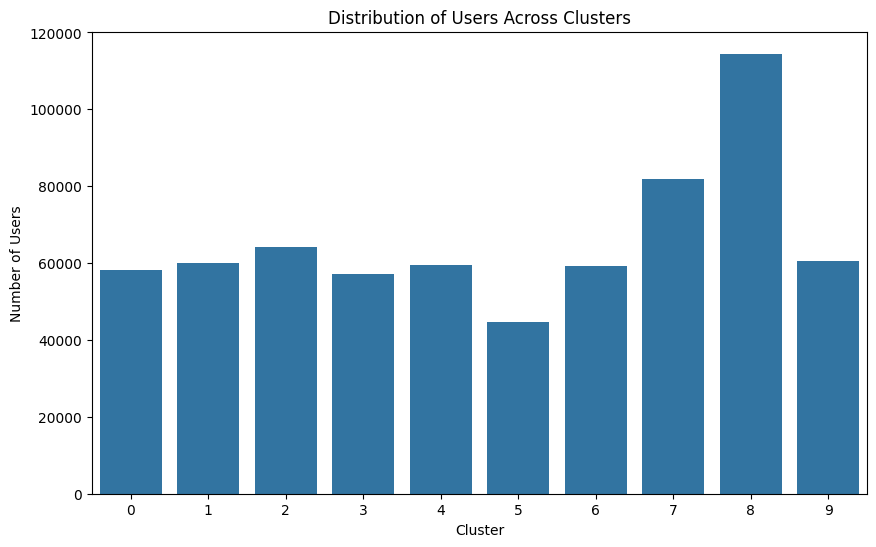

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x='cluster', data=cluster_df)
plt.title('Distribution of Users Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Users')
plt.show()

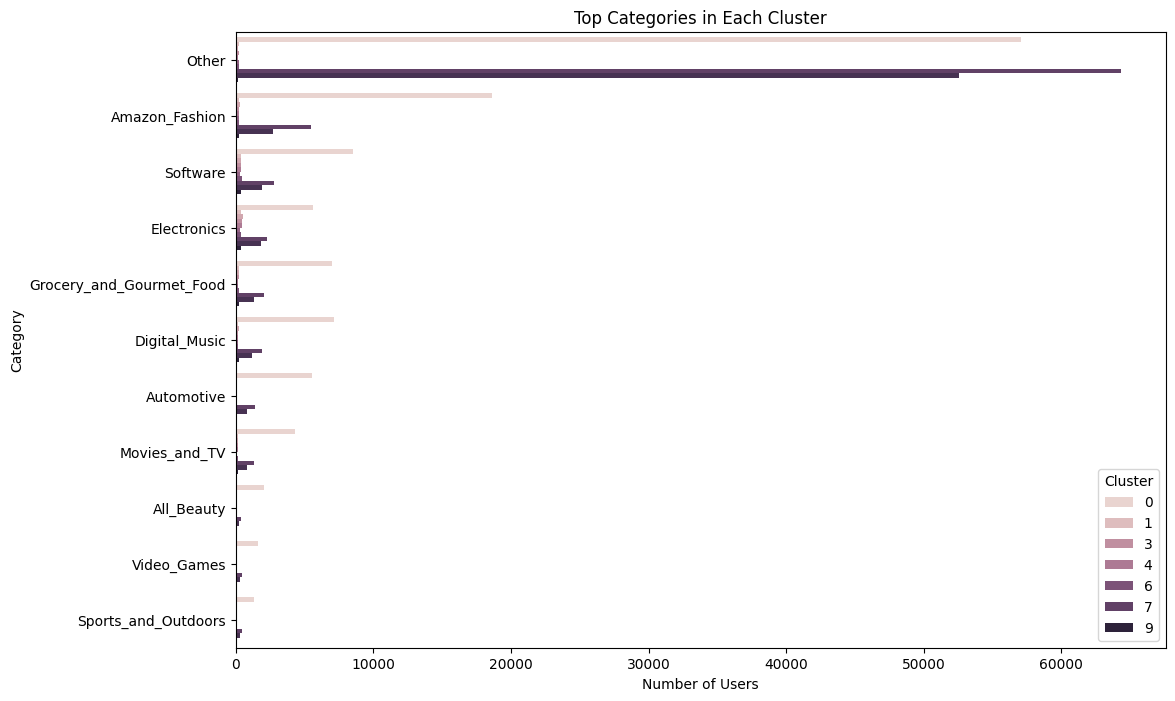

In [18]:
# Get top categories for each cluster
cluster_categories = cluster_df.groupby('cluster')['top_categories'].sum().reset_index()

# Explode the 'top_categories' column for visualization
cluster_categories_exploded = cluster_categories.explode('top_categories')

# Visualize top categories per cluster
plt.figure(figsize=(12, 8))
sns.countplot(y='top_categories', hue='cluster', data=cluster_categories_exploded,
              order=cluster_categories_exploded['top_categories'].value_counts().index)
plt.title('Top Categories in Each Cluster')
plt.xlabel('Number of Users')
plt.ylabel('Category')
plt.legend(title='Cluster')
plt.show()

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Get cluster centers (you might need to calculate these based on your clustering method)
cluster_centers = kmeans.cluster_centers_  # Assuming you used KMeans

# Plot the data points with cluster assignments
plt.figure(figsize=(10, 6))
# Assuming 'user' column contains numerical user IDs:
plt.scatter(cluster_df['user'], np.zeros_like(cluster_df['user']), c=cluster_df['cluster'], cmap='viridis')

# Draw circles around clusters, but only using the first element of the center for x-coordinate
for i, center in enumerate(cluster_centers):
    radius = 0.5  # Adjust as needed
    # Use center[0] to get the first element (x-coordinate) for the circle
    circle = plt.Circle((center[0], 0), radius, color='r', fill=False)
    plt.gca().add_patch(circle)

plt.title('Clusters with Overlapping Data Points')
plt.xlabel('User')
plt.ylabel('')  # No relevant label for y-axis in this case
plt.show()

NameError: name 'cluster_df' is not defined

<Figure size 1000x600 with 0 Axes>

In [9]:
from scipy.spatial.distance import cdist

# Calculate distances between data points and cluster centers
distances = cdist(cluster_df[['user', 'cluster']], cluster_centers)

# Find points within the radius of multiple clusters
overlapping_points = np.where(np.sum(distances <= radius, axis=1) > 1)[0]

# Print or visualize overlapping points
print("Overlapping points:", overlapping_points)

ValueError: XA and XB must have the same number of columns (i.e. feature dimension.)

In [11]:
# Save the LSH index
import pickle
with open('lsh_index.pkl', 'wb') as f:
    pickle.dump(lsh, f)

# Save any other relevant data, like user_minhashes or cluster_df
with open('user_minhashes.pkl', 'wb') as f:
    pickle.dump(user_minhashes, f)

# ... (save other data as needed)

KeyboardInterrupt: 

In [ ]:
import pickle

# Load the LSH index
with open('lsh_index.pkl', 'rb') as f:
    lsh = pickle.load(f)

# Load other saved data
with open('user_minhashes.pkl', 'rb') as f:
    user_minhashes = pickle.load(f)

# ... (load other data as needed)